In [1]:
from sympy import symbols, cos, sin, linsolve
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, ReferenceFrame, Point, \
Particle, RigidBody, inertia, LagrangesMethod, Lagrangian, Linearizer
init_vprinting()
x, theta, phi = dynamicsymbols('x theta, phi') # 3 INDEPENDENT generalized coorindates
xd, thetad, phid = dynamicsymbols('x theta phi', 1)
xdd, thetadd, phidd = dynamicsymbols('x theta, phi', 2)
l, m, g, M, u = symbols('l m g M u') # length of a link, mass of link, accn due to gravity

In [2]:
N = ReferenceFrame('N')

In [3]:
O = Point('O')
C = Point('C')

In [4]:
# Kinematics of the cart
C.set_pos(O, x*N.x)
r_OC_vector = C.pos_from(O)
C.set_vel(N, xd*N.x)
N_v_C = C.vel(N)
N_a_C = C.acc(N)

In [5]:
# Kinematics of link A
A = ReferenceFrame('A')
A.orient(N, 'Axis', (-theta, N.z))

In [6]:
# Kinematics of Link B
B = ReferenceFrame('B')
B.orient(A, 'Axis', (-phi, A.z))

In [7]:
P = Point('P')
P.set_pos(C, l*A.y)

In [8]:
Particle_C = Particle('Cart', C, m)
Particle_C.potential_energy = 0

In [9]:
# Create Link A as a Rigid Body
A_star = Point('A_star')
A_star.set_pos(C, l/2*A.y)
inertia_of_A_about_A_star = (inertia(A, 0, 0, M*l**2/12), A_star)
LinkA = RigidBody('Link_A', A_star, A, M, inertia_of_A_about_A_star)
LinkA.kinetic_energy(N)
LinkA.potential_energy = M*g*l*cos(theta)

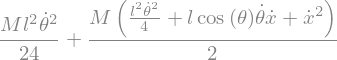

In [10]:
LinkA.kinetic_energy(N)

In [11]:
# Create Link B as a Rigid Body
B_star = Point('B_star')
B_star.set_pos(A_star, l/2*B.y)
inertia_of_B_about_B_star = (inertia(B, 0, 0, M*l**2/12), B_star)
LinkB = RigidBody('Link_B', B_star, B, M, inertia_of_B_about_B_star)
LinkB.kinetic_energy(N)
LinkB.potential_energy = M*g*l*cos(theta) + M*g*l*cos(phi)

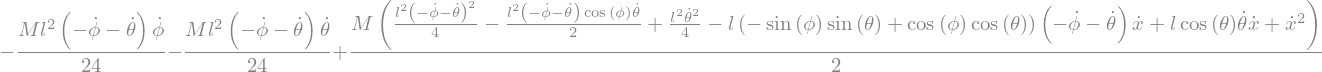

In [12]:
LinkB.kinetic_energy(N)

In [13]:
# Equations of motion
q = [x, theta, phi]
L = Lagrangian(N, Particle_C, LinkA, LinkB)
m = LagrangesMethod(L, q)
LM = m.form_lagranges_equations()

In [27]:
# Jacobian linearisation
linearizer = m.to_linearizer(q, [xd, thetad, phid])
M, A, B = linearizer.linearize(A_and_B=False, op_point=O)

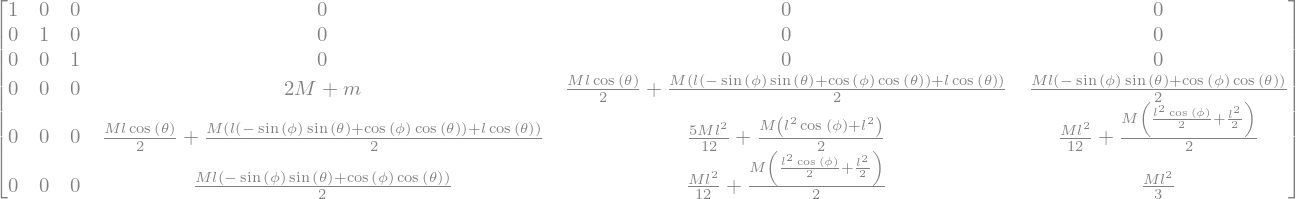

In [28]:
M

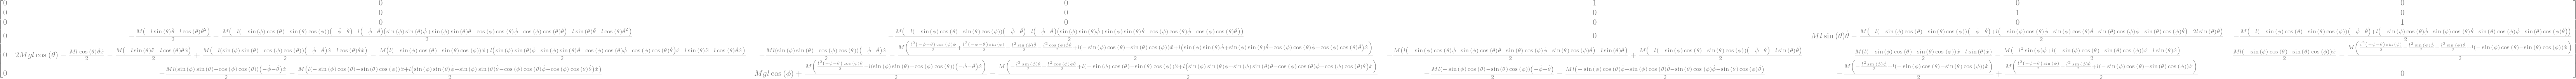

In [29]:
A

In [30]:
B